Average Random Accuracy: 0.2187


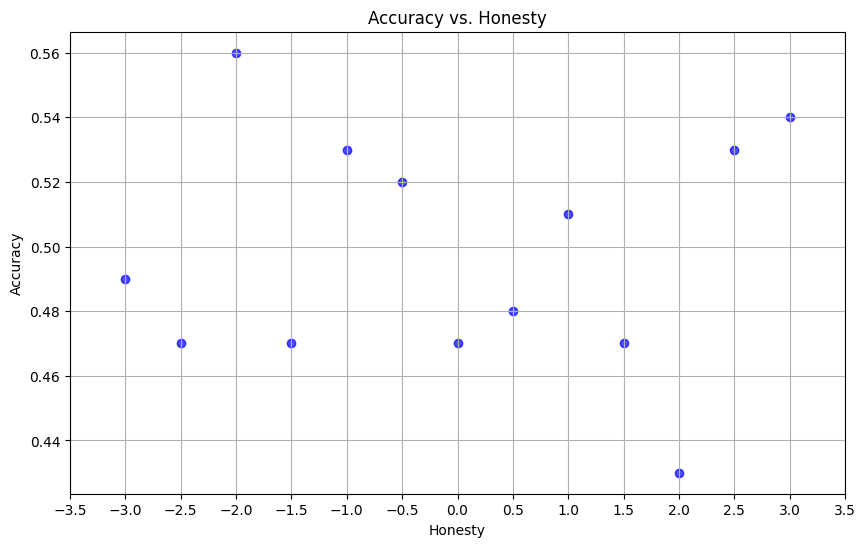

In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def load_eval_data(eval_dir):
    """Load evaluation data from JSON files in the specified directory."""
    honesty_values = []
    accuracies = []
    random_accuracies = []

    for filename in os.listdir(eval_dir):
        if filename.endswith('.json'):
            filepath = os.path.join(eval_dir, filename)
            with open(filepath, 'r') as f:
                data = json.load(f)
                honesty = data.get('control_settings', {}).get('honest')
                accuracy = data.get('control_settings_evaluation', {}).get('accuracy')
                random_accuracy = data.get('random_accuracy')

                if honesty is not None and accuracy is not None and random_accuracy is not None:
                    honesty_values.append(honesty)
                    accuracies.append(accuracy)
                    random_accuracies.append(random_accuracy)
                else:
                    print(f"Warning: Missing data in file {filename}")

    return np.array(honesty_values), np.array(accuracies), np.array(random_accuracies)

def compute_average_random_accuracy(random_accuracies):
    """Compute the average of random_accuracy values."""
    return np.mean(random_accuracies)

def plot_accuracy_vs_honesty(honesty, accuracy):
    """Plot accuracy against honesty using Matplotlib."""
    plt.figure(figsize=(10, 6))
    plt.scatter(honesty, accuracy, color='blue', alpha=0.7)
    plt.xlabel('Honesty')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Honesty')
    plt.xlim(-3.5, 3.5)
    plt.xticks(np.arange(-3.5, 4, 0.5))
    plt.grid(True)
    plt.show()

def main():
    eval_dir = 'eval_results'
    
    # Load data
    honesty, accuracy, random_accuracy = load_eval_data(eval_dir)
    
    if honesty.size == 0:
        print("No valid data found in the directory.")
        return

    # Compute average random accuracy
    average_random_accuracy = compute_average_random_accuracy(random_accuracy)
    print(f'Average Random Accuracy: {average_random_accuracy:.4f}')

    # Plot the data
    plot_accuracy_vs_honesty(honesty, accuracy)

if __name__ == "__main__":
    main()